# Inverse Kinematik

## Inverse Kinematic computation for a multi-segmented arm in two dimensions

Given is a robotic arm manipulator. Your task is to provide the inverse kinematic calculation for the arm. The segments length are initialized to 1 and there is a visualization of a given posture.

## The two segmented arm 

For this arm, you can find (and should already have) found an analytical solution for inverse kinematics.

Your task is now to find an iterative approach. For each joint (start with a single one): 

* Compute how the position of the end-effector changes when you slightly move the joint in either of the two directions
* Choose the direction which brings the end effector closer to the target and slightly move the joint in that direction
* Continue this approach until you are converging on the target position.

In [1]:
%matplotlib widget

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Button, FloatSlider, VBox
from matplotlib.patches import Rectangle, Polygon, Arrow
from matplotlib.collections import PatchCollection
import time

In [2]:
class TwoSegmentManipulator:
    def __init__(self, l1=1, l2=1):
        # Constructor to set the length of the two segments
        self.l1 = l1
        self.l2 = l2
        self.theta = np.array([0.,0.])
        self.delta_angle = 0.1

    def set_theta(self, new_theta):
        self.theta = new_theta

    def get_theta(self):
        return self.theta
    
    def forward_kinematics(self, theta=None):
        # Method to compute the forward kinematics of the manipulator
        # based on the joint angles theta
        x = self.l1*np.cos(theta[0]) + self.l2*np.cos(theta[0]+theta[1])
        y = self.l1*np.sin(theta[0]) + self.l2*np.sin(self.theta[0]+theta[1])
        return np.array([x, y])
    
    def inverse_kinematics(self, target):
        # Method to compute the inverse kinematics of the manipulator
        # based on the target position (x, y)
        # TODO - you have to implement this
        return np.array([0., 0.])
    
    def iterative_inverse_kinematics(self, target):
        # TODO Implement this function
        # for each joint
        theta_delta = 0.1
        
        for i in range(0,2):
            # Vary the joint angle slightly and check which brings the end effector closer 
            # to the target
            
            current_pos = self.forward_kinematics()
            
            theta_save = self.theta[i]
            self.theta[i] = theta_save + theta_delta
            
            
            new_pos = self.forward_kinematics()
            
            delta_pos = new_pos - current_pos
            
            if not delta_pos > 0:
                self.theta[i] = theta_save
                
            
            

            # Move the self.theta[i] into that direction.
    
    def visualize(self):
        # Create a figure and axis
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

        self.fig = fig
        self.ax = ax
        # Method to visualize the manipulator given the joint angles theta
        p1 = np.array([0, 0])
        p2 = np.array([self.l1*np.cos(self.theta[0]), self.l1*np.sin(self.theta[0])])
        p3 = p2 + np.array([self.l2*np.cos(self.theta[0]+self.theta[1]), self.l2*np.sin(self.theta[0]+self.theta[1])])
        
        # Plot the segments of the manipulator
        self.s_1, = plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'bo-')
        self.s_2, = plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'ro-')
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)


    def update_visualization(self):
        # Update the visualization of the robot's pose and history
        p1 = np.array([0, 0])
        p2 = np.array([self.l1*np.cos(self.theta[0]), self.l1*np.sin(self.theta[0])])
        p3 = p2 + np.array([self.l2*np.cos(self.theta[0]+self.theta[1]), self.l2*np.sin(self.theta[0]+self.theta[1])])
        self.s_1.set_data([[p1[0], p2[0]], [p1[1], p2[1]]])
        self.s_2.set_data([[p2[0], p3[0]], [p2[1], p3[1]]])

    def set_target_for_iterative_inverse_kinematics(self,target):
        self.target = target

    def simulation_run_anim(self, steps=10, button=None):
        # Run the simulation for a certain number of steps
        for i in range(0, 10):
            self.iterative_inverse_kinematics(self.target)
            self.update_visualization()
            self.fig.canvas.draw()
            time.sleep(0.1)

## Calling the class with examples

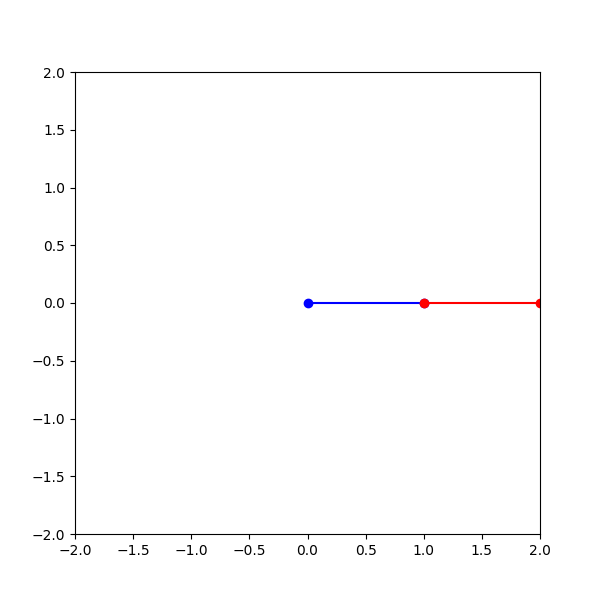

In [3]:
# Create buttons and sliders for simulation control
button_run_anim = Button(description="Run Animation")

manipulator = TwoSegmentManipulator()
manipulator.set_target_for_iterative_inverse_kinematics( np.array([1.,1.]) )

# Define the event handlers for buttons and sliders
button_run_anim.on_click(manipulator.simulation_run_anim)

# Display the buttons and sliders in a VBox
controls = VBox([button_run_anim]) # button_reset, button_step, button_run_anim, button_run])
display(controls)

# Start the simulation
manipulator.visualize()
plt.show()

## 3-segmented Manipulator

Extend this now for a three-segmented manipulator for which there is no closed analytical solution (and there are multiple solutions possible for many targets).

In [4]:
class ThreeSegmentManipulator:
    def __init__(self, l1=1, l2=1, l3=1):
        # Constructor to set the length of the two segments
        self.l1 = l1
        self.l2 = l2
        self.l3 = l3
        self.theta = np.array([0.,0., 0.])
        self.delta_angle = 0.05

    def set_theta(self, new_theta):
        self.theta = new_theta

    def get_theta(self):
        return self.theta
    
    def forward_kinematics(self, theta=None):
        # Method to compute the forward kinematics of the manipulator
        # based on the joint angles theta
        x = self.l1*np.cos(theta[0]) + self.l2*np.cos(theta[0]+theta[1]) + self.l3*np.cos(theta[0]+theta[1]+theta[2])
        y = self.l1*np.sin(theta[0]) + self.l2*np.sin(self.theta[0]+theta[1]) + self.l3*np.sin(self.theta[0]+theta[1]+theta[2])
        return np.array([x, y])
    
    def iterative_inverse_kinematics(self, target):
        # TODO Implement this function
        # for each joint
        # for i in range(0,2):
            # Vary the joint angle slightly and check which brings the end effector closer 
            # to the target

            # Move the self.theta[i] into that direction.
        pass
    
    def visualize(self):
        # Create a figure and axis
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))

        self.fig = fig
        self.ax = ax
        # Method to visualize the manipulator given the joint angles theta
        p1 = np.array([0, 0])
        p2 = np.array([self.l1*np.cos(self.theta[0]), self.l1*np.sin(self.theta[0])])
        p3 = p2 + np.array([self.l2*np.cos(self.theta[0]+self.theta[1]), self.l2*np.sin(self.theta[0]+self.theta[1])])
        p4 = p3 + np.array([self.l3*np.cos(self.theta[0]+self.theta[1]+self.theta[2]), self.l3*np.sin(self.theta[0]+self.theta[1]+self.theta[2])])

        # Plot the segments of the manipulator
        self.s_1, = plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'bo-')
        self.s_2, = plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'ro-')
        self.s_3, = plt.plot([p3[0], p4[0]], [p3[1], p4[1]], 'go-')
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)


    def update_visualization(self):
        # Update the visualization of the robot's pose and history
        p1 = np.array([0, 0])
        p2 = np.array([self.l1*np.cos(self.theta[0]), self.l1*np.sin(self.theta[0])])
        p3 = p2 + np.array([self.l2*np.cos(self.theta[0]+self.theta[1]), self.l2*np.sin(self.theta[0]+self.theta[1])])
        p4 = p3 + np.array([self.l3*np.cos(self.theta[0]+self.theta[1]+self.theta[2]), self.l3*np.sin(self.theta[0]+self.theta[1]+self.theta[2])])
        self.s_1.set_data([[p1[0], p2[0]], [p1[1], p2[1]]])
        self.s_2.set_data([[p2[0], p3[0]], [p2[1], p3[1]]])
        self.s_3.set_data([[p3[0], p4[0]], [p3[1], p4[1]]])

    def set_target_for_iterative_inverse_kinematics(self,target):
        self.target = target

    def simulation_run_anim(self, steps=10, button=None):
        # Run the simulation for a certain number of steps
        for i in range(0, 10):
            self.iterative_inverse_kinematics(self.target)
            self.update_visualization()
            self.fig.canvas.draw()
            time.sleep(0.1)

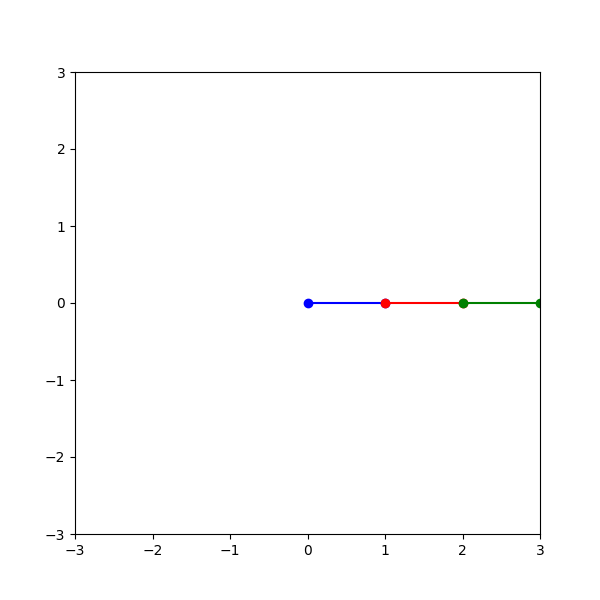

In [5]:
# Create buttons and sliders for simulation control
button_run_anim = Button(description="Run Animation")

manipulator_3 = ThreeSegmentManipulator()
manipulator_3.set_target_for_iterative_inverse_kinematics( np.array([0.,3.]) )

# Define the event handlers for buttons and sliders
button_run_anim.on_click(manipulator_3.simulation_run_anim)
# Display the buttons and sliders in a VBox
controls = VBox([button_run_anim]) # button_reset, button_step, button_run_anim, button_run])
display(controls)

# Start the simulation
manipulator_3.visualize()
plt.show()